In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Get The Dataset

In [3]:
columns_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("dataset/ml-100k/u.data",sep='\t', names=columns_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].nunique()

1682

In [8]:
movies_titles= pd.read_csv("dataset/ml-100k/u.item", sep="\|", encoding='latin-1',header = None)

In [9]:
movies_titles.shape

(1682, 24)

In [10]:
movies_titles = movies_titles[[0,1]]

In [11]:
movies_titles.columns = ['item_id','title']

In [12]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df = pd.merge(df, movies_titles, on="item_id")

In [14]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [16]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [17]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [18]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [19]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').mean()['rating'])

In [22]:
ratings.sort_values(by='rating', ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,5.0
Marlene Dietrich: Shadow and Light (1996),5.0,5.0
"Saint of Fort Washington, The (1993)",5.0,5.0
Someone Else's America (1995),5.0,5.0
Star Kid (1997),5.0,5.0
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1.0
King of New York (1990),1.0,1.0
Touki Bouki (Journey of the Hyena) (1973),1.0,1.0


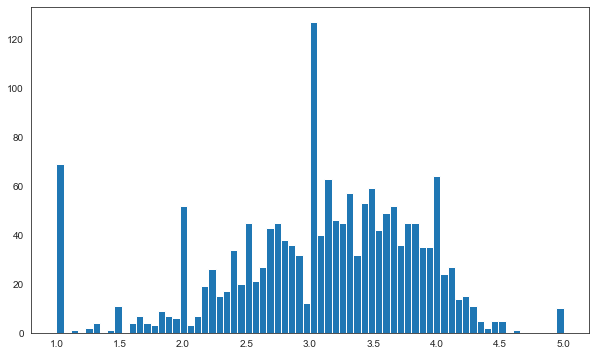

In [23]:
plt.figure(figsize = (10,6))
plt.hist(ratings['num of ratings'], bins = 70)
plt.show()

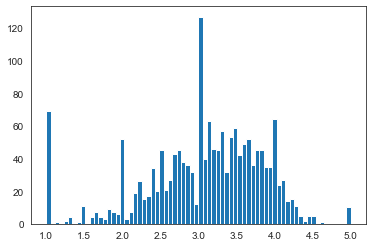

In [24]:
plt.hist(ratings['rating'],bins=70)
plt.show()

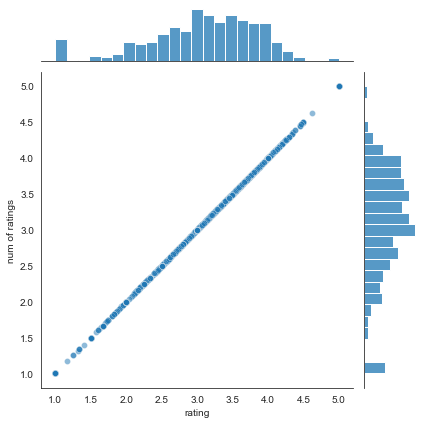

In [25]:
sns.jointplot(x='rating' ,y='num of ratings' , data=ratings, alpha=0.5)

## Creating Movie Recommendation

In [26]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [27]:
moviemat = df.pivot_table(index="user_id", columns= "title", values="rating")

In [29]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [32]:
ratings.sort_values('num of ratings', ascending=False).head()

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,5.0
Marlene Dietrich: Shadow and Light (1996),5.0,5.0
"Saint of Fort Washington, The (1993)",5.0,5.0
Someone Else's America (1995),5.0,5.0
Star Kid (1997),5.0,5.0


In [37]:
starwar_user_ratings = moviemat['Star Wars (1977)']
starwar_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [39]:
similar_to_starwars = moviemat.corrwith(starwar_user_ratings)

In [42]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [44]:
corr_starwars.dropna(inplace= True)

In [45]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [47]:
corr_starwars.sort_values('Correlation', ascending= False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [49]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,2.333333
1-900 (1994),2.600000,2.600000
101 Dalmatians (1996),2.908257,2.908257
12 Angry Men (1957),4.344000,4.344000
187 (1997),3.024390,3.024390
...,...,...
Young Guns II (1990),2.772727,2.772727
"Young Poisoner's Handbook, The (1995)",3.341463,3.341463
Zeus and Roxanne (1997),2.166667,2.166667


In [48]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [50]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,2.333333
1-900 (1994),-0.645497,2.600000
101 Dalmatians (1996),0.211132,2.908257
12 Angry Men (1957),0.184289,4.344000
187 (1997),0.027398,3.024390


In [56]:
corr_starwars[corr_starwars['num of ratings']>1].sort_values('Correlation', ascending=False)

,Correlation,num of ratings
title,,
Commandments (1997),1.0,2.666667
Cosi (1996),1.0,4.000000
No Escape (1994),1.0,2.400000
Stripes (1981),1.0,3.800000
Man of the Year (1995),1.0,3.111111
...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,2.800000
For Ever Mozart (1996),-1.0,2.000000
American Dream (1990),-1.0,2.500000


## Predict Function

In [57]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace= True)
    
    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie['num of ratings']>1].sort_values('Correlation', ascending=False)
    
    return predictions

In [58]:
predictions = predict_movies("Titanic (1997)")

In [59]:
predictions.head()

,Correlation,num of ratings
title,,
Nadja (1994),1.0,2.250000
"Pest, The (1997)",1.0,1.875000
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.000000
For Ever Mozart (1996),1.0,2.000000
"Jerky Boys, The (1994)",1.0,2.666667
